In [26]:
# let's import the imporant modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import seaborn as sns

In [73]:
# import the dataset
dataset = pd.read_csv('kc_house_data.csv')
#dataset.info()
##get correlation between features and output to know which features to use
#dataset.corr()>0.5
#dataset.corr()>=0.7
#>0.5 = bedrooms,bathroomss, sqft_living,grade,sqft_above and sqft_living15 are features with corr > 0.5
#sqft_living and sqft_above have corr>0.8 and have almost same meaning and contribution, so we should
#choose only one of them
dataset = dataset.drop(["id","date"], axis=1)


In [74]:
training_data = dataset.iloc[:,1:].values
goal_data = dataset.iloc[:,0].values
# training_data.info
#training_data.describe()
#goal_data.describe()

Statistics for Boston housing dataset:

Minimum price: $75000.0
Maximum price: $7700000.0
Mean price: $540088.1417665294
Median price $450000.0
Standard deviation of prices: $367118.7031813723


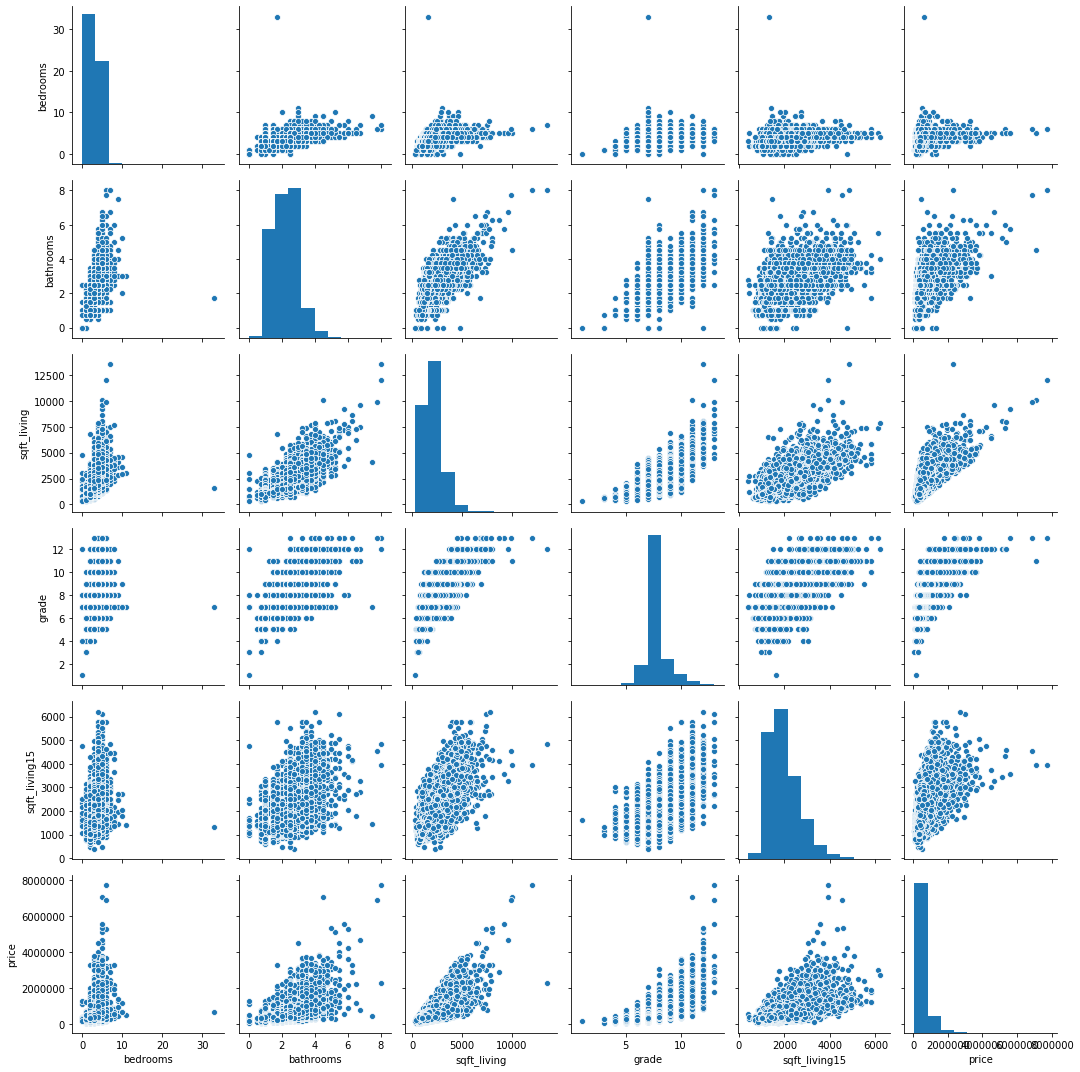

In [75]:
# Minimum price of the data
minimum_price = np.min(goal_data)

# Maximum price of the data
maximum_price = np.max(goal_data)

# Mean price of the data
mean_price = np.mean(goal_data)

# Median price of the data
median_price = np.median(goal_data)

# Standard deviation of prices of the data
std_price = np.std(goal_data)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))


#Calculate and show pairplot to see the relations between different features and price
sns.pairplot(df, height = 2.5)
plt.tight_layout()

In [76]:
##this part has been commented as some values are meant to be zero, not NAN
##filling in empty cells with the mean of values of the column
# from sklearn.preprocessing import Imputer
# # make a new imputer 
# imputer = Imputer(missing_values='NaN', strategy='mean',axis=0)

# #fills empty cells with mean of column,axis = 0 column
# training_data = imputer.fit_transform(training_data)


# split train and test sets
from sklearn.model_selection import train_test_split
train_set, test_set, goal_train, goal_test = train_test_split(training_data, goal_data, test_size=0.2, random_state = 0)


In [77]:
#scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_set = scaler.fit_transform(train_set)
test_set = scaler.transform(test_set)

#creating simple regression model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(train_set,goal_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
from sklearn.metrics import mean_squared_error
goal_predict = linear_model.predict(test_set)

test_set_rmse = (np.sqrt(mean_squared_error(goal_test, abs(goal_predict))))
print(test_set_rmse)

189901.69469503255


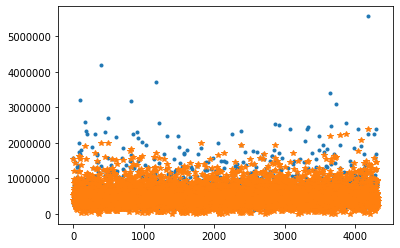

In [83]:
plt.plot(goal_test, '.', abs(goal_predict),'*')
plt.show()

In [84]:
goal_test
print(np.max(goal_test))
print(np.min(goal_test))

5570000.0
89000.0


In [86]:
goal_predict
print(np.max(goal_predict))
print(np.min(abs(goal_predict)))

2384696.9227921106
199.0772078895243
